## Importaciones e instalaciones

In [4]:

import pandas as pd # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV # type: ignore
from sklearn.neighbors import KNeighborsClassifier # type: ignore
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix # type: ignore
from sklearn.preprocessing import StandardScaler # type: ignore
import numpy as np # type: ignore
from sklearn.ensemble import RandomForestClassifier # type: ignore
from sklearn.svm import SVC # type: ignore
from sklearn.neural_network import MLPClassifier  # type: ignore


## Preprocesamiento de los datos


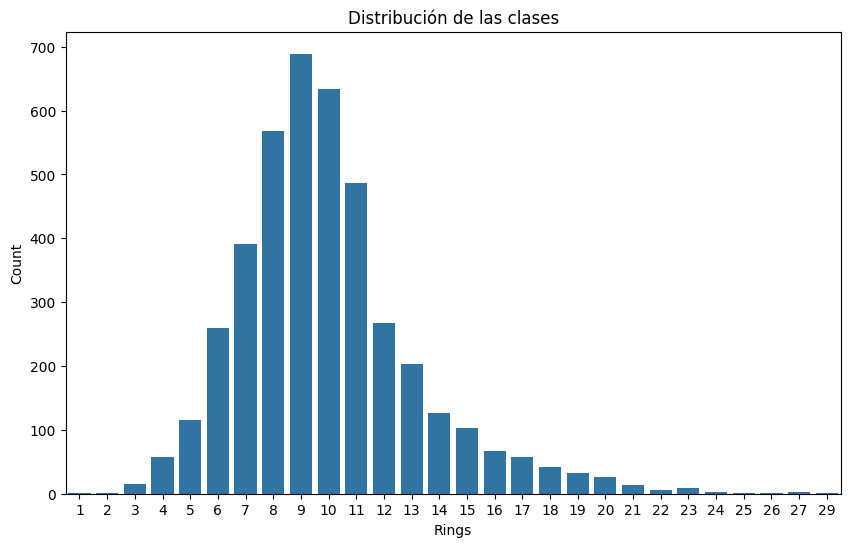

In [5]:
cols = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight','Viscera weight', 'Shell weight', 'Rings']

data = pd.read_csv('./data/abalone.data', sep = ',', names = cols)
X = data.drop(['Rings'], axis = 1)
y= data['Rings']
plt.figure(figsize=(10, 6))
sns.countplot(x='Rings', data=data)
plt.title('Distribución de las clases')
plt.xlabel('Rings')
plt.ylabel('Count')
plt.show()



## Categorizando el sexo
* Asi tenemos cada una de las categorias de 'Sex' en variables continuas

In [6]:
data_features = X.copy()
data_features = pd.get_dummies(data_features, columns=['Sex'], dtype=int)
data_features

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1,0,0


### Pairplot: Verificamos la dispersion de las caracteristicas para ver como se separan en el espacio y la correlacion que poseen unas con otras

<Figure size 1200x800 with 0 Axes>

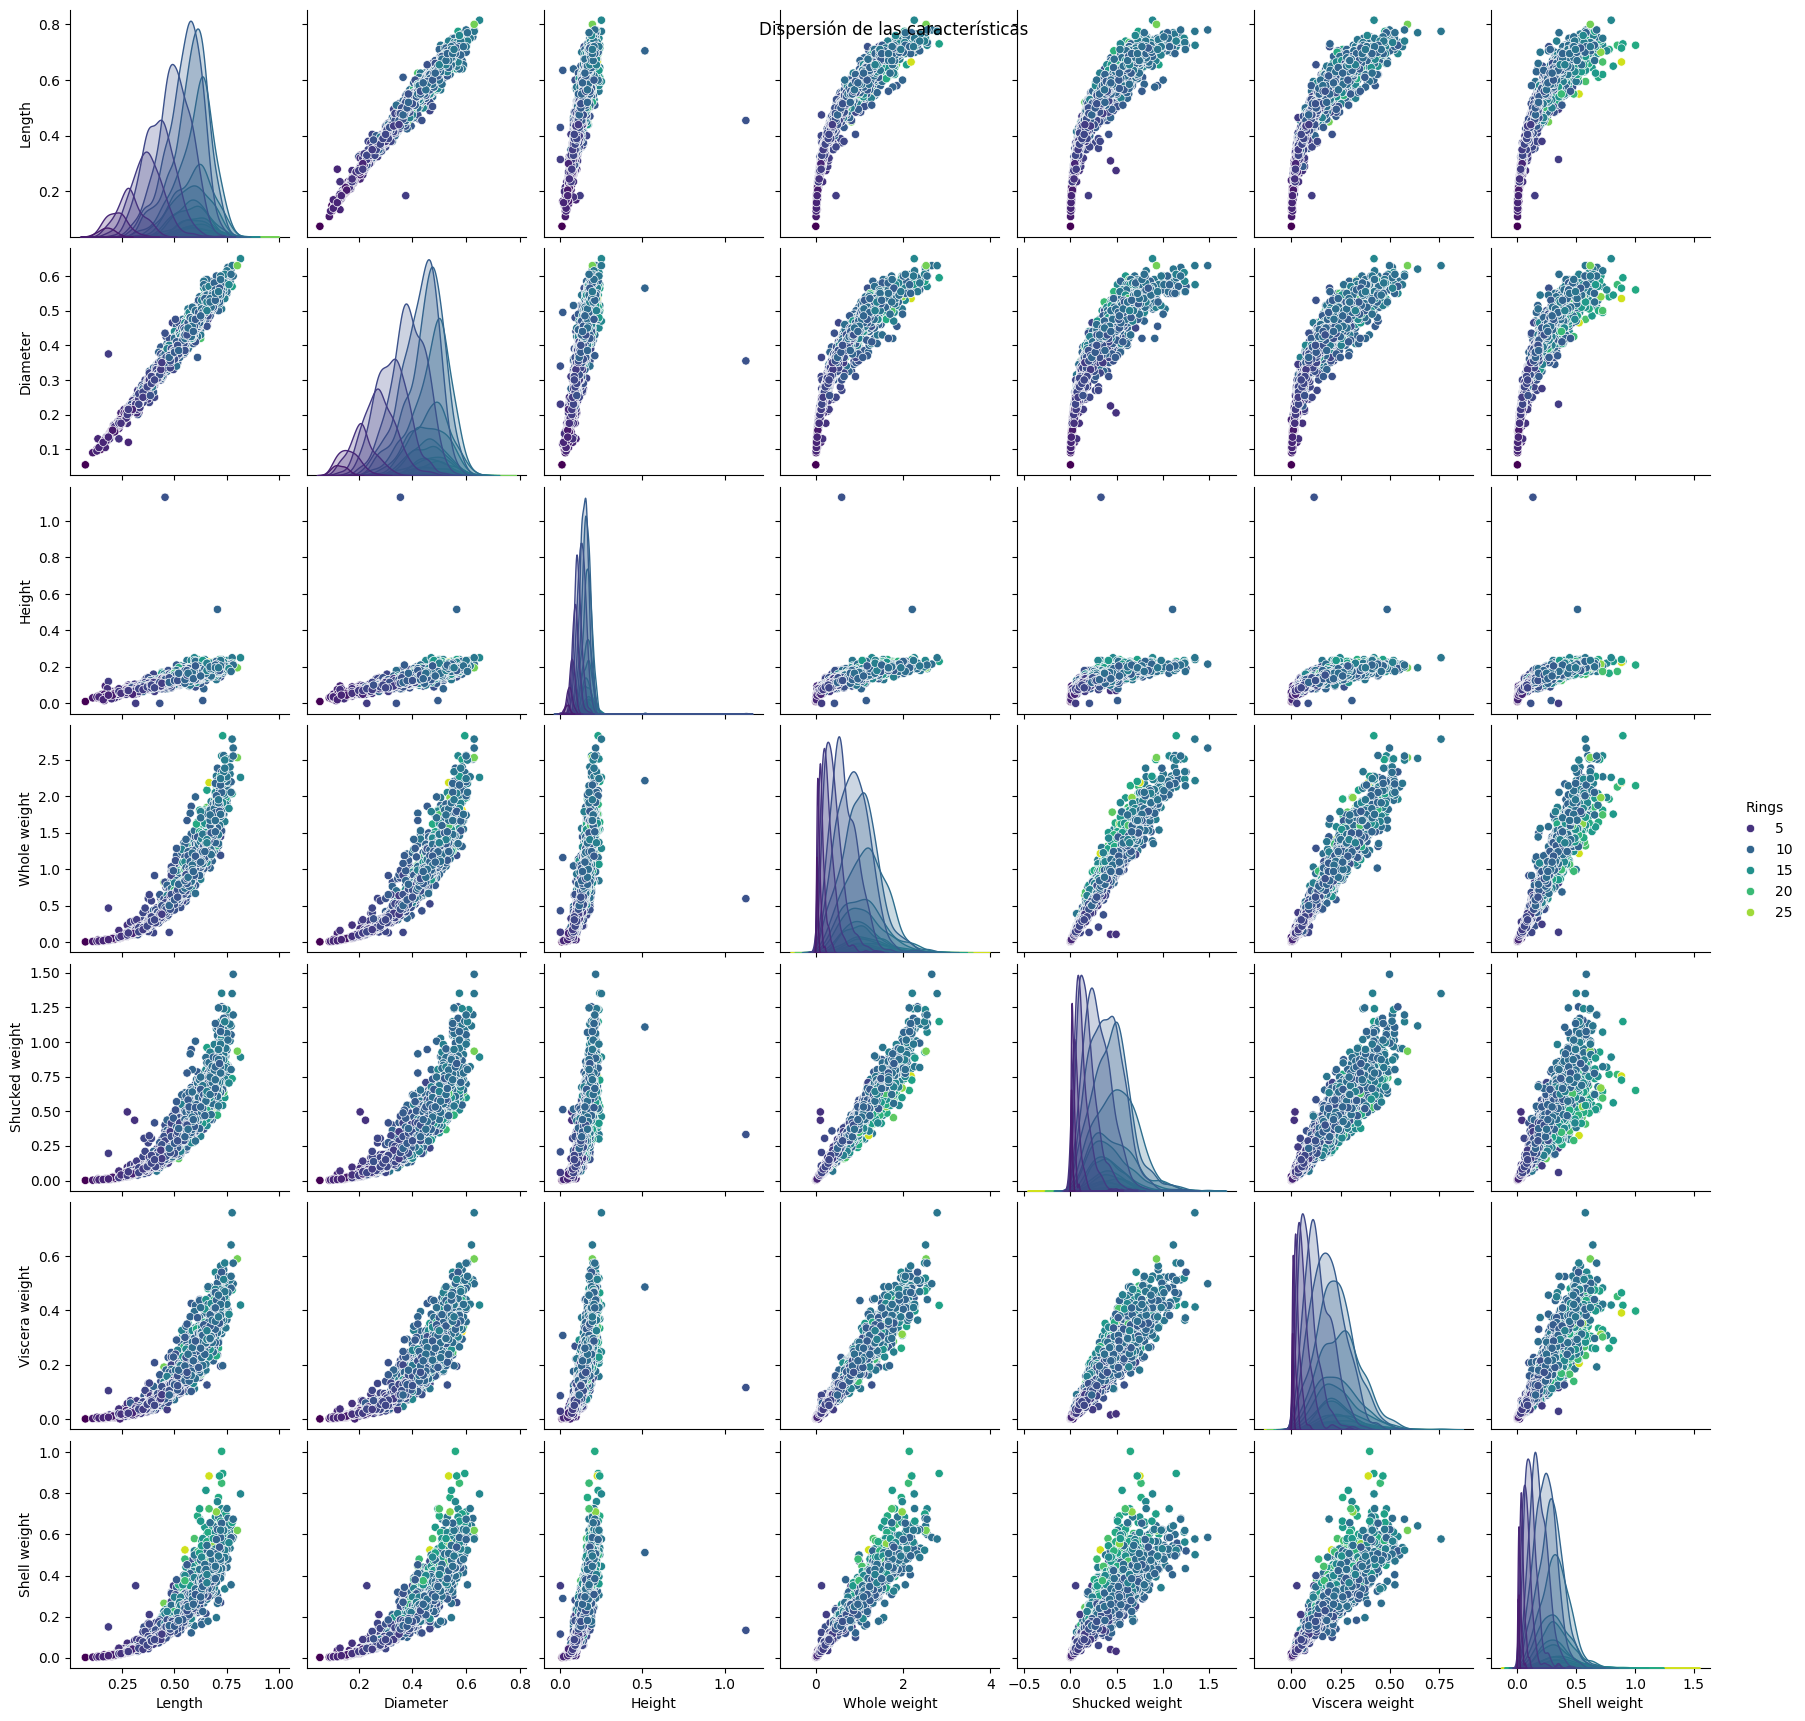

In [7]:
plt.figure(figsize=(12, 8))
sns.pairplot(data=data, hue='Rings', palette='viridis')
plt.suptitle('Dispersión de las características')
plt.show()

## Funcion de clasificacion para los anillos
* Hacemos esto para mejorar nuestros modelos de manera significativa!


In [8]:
#Split para entrenamiento y validación
def group_rings(ring):
    if ring <= 7:
        return 0
    elif ring <= 11:
        return 1
    elif ring <= 15:
        return 2
    else:
        return 3

## Data a usar!!

In [9]:
y_grouped = y.apply(group_rings)
X_train, X_test, y_train, y_test = train_test_split(data_features, y_grouped, test_size=0.2, random_state=0)

## Modelo KNN

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = KNeighborsClassifier(n_neighbors=24)
scores = cross_val_score(model, X_train_scaled, y_train, cv=3)

print("Cross-validated Scores:", scores)
print("Mean CV Accuracy:", scores.mean())

print('------------------------------------------------------------')

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1_score_svc = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1_score:", f1_score_svc)

Cross-validated Scores: [0.68043088 0.6929982  0.69631626]
Mean CV Accuracy: 0.6899151155782027
------------------------------------------------------------
Accuracy: 0.6710526315789473
Precision: 0.5919833289613117
Recall: 0.44933945668171416
F1_score: 0.4492862021106467


## Conclusiones KNN

* Si bien se intento contrarrestar el desbalance de caracteristicas eligiendo solo las que tuvieran un numero suficiente de entradas, sno se consiguio que el desempeño no mejorara notablemente.

* Se puede apreciar que las clases no están claramente separadas en el espacio de características, lo que puede hacer que el modelo tenga dificultades para distinguir entre ellas, ya que se basa en la suposición de que puntos cercanos en el espacio de características.

* Al agrupar las clases obtenemos una mejora de rendimiento considerable, esto debido a que el modelo en lugar de trabajar con 10 clases ahora solo trabaja con 4

## Modelo RFC(Random Forest Classifier)

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

model = RandomForestClassifier(random_state=40)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')


grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1_score_svc = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1_score:", f1_score_svc)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


c:\Users\Camilo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


c:\Users\Camilo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy: 0.6842105263157895
Precision: 0.6059533332249936
Recall: 0.4974312247771656
F1_score: 0.5191327398225031


## Conclusiones con RFC

* Rendimiento General: Aunque el accuracy es razonablemente alto (0.684), las métricas de recall y F1-score sugieren que el modelo tiene dificultades para balancear entre la identificación de verdaderos positivos y la minimización de falsos negativos, a pesar que el modelo tuvo un gran preprocesamiento puede que los valores iniciales tengan problemas debido a su naturaleza(no se agrupan mucho)

* Consistencia y Generalización: La utilización de GridSearchCV y la validación cruzada con 3 pliegues ayudaron al modelo para que sea robusto y capaz de generalizar bien a nuevos datos. pero, los resultados nos muestra que el modelo podría beneficiarse de oalgunos parametros mas.

## RNA

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = MLPClassifier(hidden_layer_sizes=(1000,), max_iter=500, random_state=40)
scores = cross_val_score(model, X_train_scaled, y_train, cv=3)

print("Cross-validated Scores:", scores)
print("Mean CV Accuracy:", scores.mean())

print('------------------------------------------------------------')

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1_score_svc = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1_score:", f1_score_svc)

Cross-validated Scores: [0.70556553 0.72262118 0.72416891]
Mean CV Accuracy: 0.7174518757967828
------------------------------------------------------------
Accuracy: 0.6722488038277512
Precision: 0.5658582912851231
Recall: 0.5287496220912242
F1_score: 0.5403491170878024


## Conclusiones RNA

* Si bien se intento contrarrestar el desbalance de caracteristicas eligiendo solo las que tuvieran un numero suficiente de entradas, jno se consiguio que el desempeño no mejorara notablemente.

* La correlacion entre las clases elegidas puede no ser lo suficientemente baja

* Al agrupar las clases obtenemos una mejora de rendimiento considerable, esto debido a que el modelo en lugar de trabajar con 10 clases ahora solo trabaja con 4

##  Support Vectorial Machine(SVC), using SVR(Support Vectorial Regressor ) for continous values

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SVC(kernel='rbf', gamma='scale', decision_function_shape='ovr')  # 'ovo' para clasificación multiclase
scores = cross_val_score(model, X_train_scaled, y_train, cv=3)

print("Cross-validated Scores:", scores)
print("Mean CV Accuracy:", scores.mean())

print('------------------------------------------------------------')

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1_score_svc = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1_score:", f1_score_svc)

Cross-validated Scores: [0.67773788 0.68581688 0.68823001]
Mean CV Accuracy: 0.6839282555382958
------------------------------------------------------------
Accuracy: 0.6722488038277512
Precision: 0.6491269466729589
Recall: 0.4344463027242096
F1_score: 0.4196210967499866


## Matriz de confunsion SVC

## Resultados de SVC
* Consistencia y Generalización: La consistencia de los scores de validación cruzada y el Mean CV Accuracy sugieren que el modelo es razonablemente estable y tiene una capacidad de generalización aceptable.

* Rendimiento General: Aunque el accuracy es relativamente alto (0.672), las métricas de recall y F1-score revelan que el modelo tiene dificultades para balancear entre la identificación de verdaderos positivos y la minimización de falsos negativos.



## Ingenuos

In [15]:

from sklearn.naive_bayes import GaussianNB # type: ignore
# Escalado de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo Naive Bayes con validación cruzada
model = GaussianNB()
scores = cross_val_score(model, X_train_scaled, y_train, cv=3)

print("Cross-validated Scores:", scores)
print("Mean CV Accuracy:", scores.mean())

# Entrenar el modelo final
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Calcular métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1_score_nb = f1_score(y_test, y_pred, average='macro')

# Imprimir métricas
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1_score:", f1_score_nb)

Cross-validated Scores: [0.50807899 0.53770197 0.49955076]
Mean CV Accuracy: 0.5151105777270203
Accuracy: 0.5430622009569378
Precision: 0.44288969973725933
Recall: 0.4887348616032057
F1_score: 0.4550223431989125
